# Machine learning su aplicación en Biología

__Análisis de datos biológicos utilizando métodos de machine learning__

_MeIA_

`2023`

## Convolutional Neural Network

Las redes neuronales convolucionales (CNN, por sus siglas en inglés) son un tipo de algoritmo de aprendizaje automático inspirado en el funcionamiento del cerebro humano y diseñado especialmente para procesar y analizar datos de imágenes.

Las CNN son muy útiles en tareas relacionadas con la visión por computadora, como reconocimiento de objetos, clasificación de imágenes y detección de patrones visuales. Están compuestas por diferentes capas que realizan operaciones matemáticas especiales para extraer características relevantes de las imágenes y luego utilizar esas características para realizar predicciones o tomar decisiones.

La idea principal detrás de las CNN es la convolución, que es una operación matemática que se aplica entre una ventana deslizante (llamada filtro o kernel) y una región de la imagen. El filtro se desliza por toda la imagen, multiplicando los valores de los píxeles en cada posición por los valores correspondientes en el filtro. Esta operación produce un nuevo mapa de características que resalta ciertas características de la imagen, como bordes, texturas o formas.

Además de la convolución, las CNN también utilizan otras capas, como capas de activación (que introducen no linealidad al proceso), capas de agrupación (que reducen el tamaño de los mapas de características) y capas completamente conectadas (que realizan la clasificación final o toman decisiones basadas en las características extraídas).


### Implementación de CNN

La malaría es una enfermedad de la sangre causada por los parásitos Plasmodium, que se transmite a través de la picadura del mosquito hembra Anopheles. En 2016, OMS informó de 212 millones de casos de ésta enfermedad. Los exámenes microscópicos de frotis de sangre gruesos y delgados son los métodos más confiable y comúnmente utilizando para el diagnóstico de enfermedades. 

La frotis de sangre gruesos ayudan a detectar la presencia de parásitos, mientras que los frotis de sangre finos ayudan a identificar la especie de parásito que causa la infección. Estos análisis dependen de la experiencia humana y uede verse afectadanegativamente por la variabilidad entre observacdores y la responsibilidad impuesta por los diagnosticos a gran escala en regiones como enfermedades endémicas o recursos limitados.

Los investigadores de  Lister Hill National Center for Biomedical Communications (LHNCBC) desarrollaron una aplicación móvil que se ejecuta en un telefono android y se conecta al microscopio de luz convencional. Se recolectaron y fotografiaron frotis de sangre finos para pacientes infectados y sanos. Las imagenes fueron anotadas manualmente por un expero de la Mahidol-Oxford Tropical Medicine Research Unit in Bangkok.  Este conjunto de archivos se encuentra en NLM (IRB#12972) (Rajaraman et al. 2018). 

Utilizaremos CNN para clasificar las células infectadas con parásitos de la malaria y las células normales no infectadas usando imagenes de microscopía óptica. Este conjunto de datos contiene 27558 imágenes de células con instancias iguales de células parasitadas y no infectadas. Sin embargo, para que este proyecto sea manor exhaustivo desde el punto de visto computacional, seleccionamos 1000 imágenes de cada clase.



https://lhncbc.nlm.nih.gov/LHC-downloads/downloads.html#malaria-datasets

In [1]:
#Importamos algunos módulos necesarios
import os
import numpy as np
import random as rn
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt


Vamos a utilizar algunas bibliotecas que nos permitan cargar cada una de las imagenes de manera individual.

In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten,Dropout,Conv2D,MaxPool2D
from tensorflow.keras.backend import resize_images

2023-06-20 23:52:58.720070: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#Visualizamos los archivos de desde un directorio específico.
print(os.listdir("../Datos/"))

['Breast_Cancer.csv', 'Galton.txt', 'Genes_dataset.xlsx', 'annotation_file.csv', 'diabetes.csv', 'diabetes.txt', 'expression_data.csv', 'heart.csv', 'indian_liver_patient.csv', 'seeds_dataset.csv', '.DS_Store', 'Parasitized_1000', 'Uninfected_1000']


In [4]:
# Vamos a crear una función que nos permita leer cada imagen, cambiar el tamaño a 64x64 pixeles, 
# Las convierte y agrega a una matriz de Numpy, devuelve la matriz adjunta con todas las imágenes.
# Por último, devuelve la matriz adjunta con todas las imágenes.
def image_loader(dr):
    IMG_list = []
    read = lambda im: np.asarray(Image.open(im).
                                 convert("RGB").resize((64, 64)))
    for image_file in os.listdir(dr):
        Path = os.path.join(dr,image_file)
        _, ftype = os.path.splitext(Path)
        if ftype == ".png":
            img = read(Path)
            IMG_list.append(np.array(img)/255.)          
           
            
    return IMG_list

In [5]:
# Vamos a leer las 1000 imagenes para cada tipo de datos.
# Las imagenes fueron redimensionadas para que ocupen menos memoria.
Parasitized = np.array(image_loader('../Datos/Parasitized_1000'))
Uninfected = np.array(image_loader('../Datos/Uninfected_1000'))

In [6]:
# Aquí generamos 1000 ceros y 1000 unos para etiquetar el conjunto de datos, donde las células no infectadas se etiquetan como "0" 
# y las células infectadas o parasitadas se etiqeutan como "1".
Uninfected_label = np.zeros(len(Uninfected))
Parasitized_label = np.ones(len(Parasitized))

In [9]:
Parasitized.shape

(1000, 64, 64, 3)

#### Dividir el conjunto de datos en el conjunto de entrenamiento y el conjnto de prueba

In [10]:
# Unimos los datos 
# Las imágenes se asignan a la variable independiente (es decir X)
# y las etiquetas se almacenan en la variable y. 
X = np.concatenate((Uninfected, Parasitized), axis = 0)
y = np.concatenate((Uninfected_label, Parasitized_label), axis = 0)

#Ahora el conjunto de datos se divide aleatoriamente en entrenamiento y prueba, caracteristicas y etiquetas, espectivamente.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

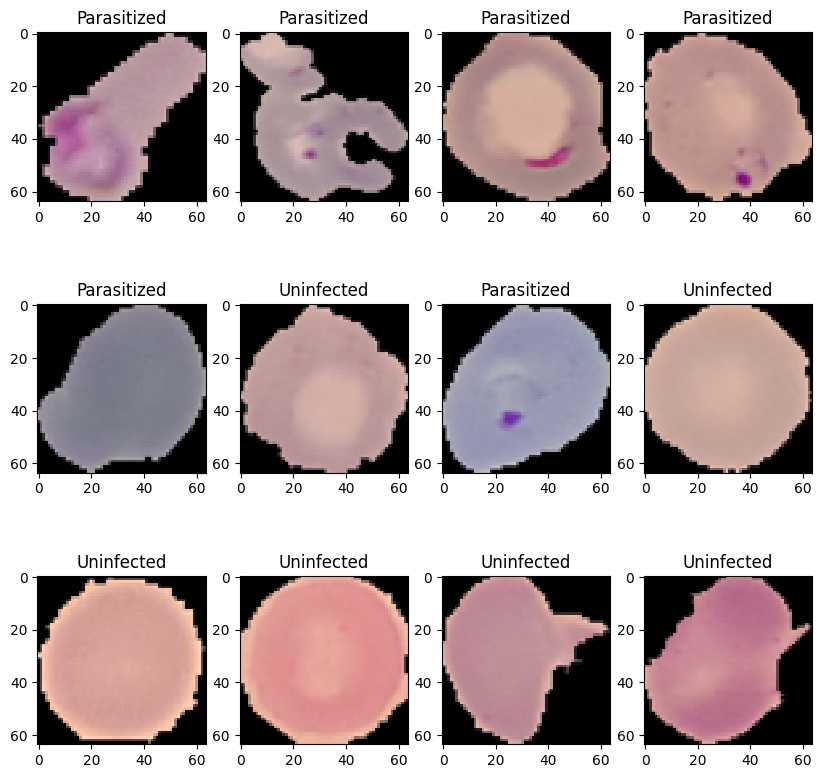

In [11]:
#Podemos ver algunas de las imagenes en el conjunto de entrenamiento
 
fig=plt.figure(figsize=(10,10))


for i in range(1, 13):
    ax = fig.add_subplot(3, 4, i)
    if y_train[i] == 0:
        ax.title.set_text('Uninfected')
    else:
        ax.title.set_text('Parasitized')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

#### Construcción del modelo

El modelo contiene siete capas además de las capas de abandono, estas son:
1. La capa de convolución 3x3 y 16 filtros con la función de activación ReLU.
2. La capa de max pool con tamaño 2x2
3. La segunda capa de convolución con 64 filtros de dimensión 3x3 y la función de activación ReLU
4. La segunda capa de max pool de tamaño 2x2
5. La capa flatten
6. La capa densamente conectada con 64 neuronas con la función de activación ReLU
7. Una sola neurona con función sigmoidea para clasificación binaria.

El modelo se compila con la función de pérdida "binary_crossentropy" y el optimizador "rmsprop"


In [12]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

### Entrenamiento del modelo

En este caso debido a que la época completa es demasiado grande, será difícil entranar todas las épocas a la vez debido a la limitación de la memoria. 

Por lo que vamos a dividir la époco aen lotes y luego entrenaremos un lote a la vez. 

Tomaremos ocho imágenes por lote . Para el resto adicionaremos early stopping callback.

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          batch_size= 8,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/400
175/175 [==============================] - 12s 64ms/step - loss: 0.6764 - accuracy: 0.5793 - val_loss: 0.6348 - val_accuracy: 0.6800
Epoch 2/400
175/175 [==============================] - 11s 60ms/step - loss: 0.6220 - accuracy: 0.6493 - val_loss: 0.5926 - val_accuracy: 0.7283
Epoch 3/400
175/175 [==============================] - 10s 59ms/step - loss: 0.5866 - accuracy: 0.7014 - val_loss: 0.6107 - val_accuracy: 0.6050
Epoch 4/400
175/175 [==============================] - 10s 59ms/step - loss: 0.5775 - accuracy: 0.6957 - val_loss: 0.4961 - val_accuracy: 0.7717
Epoch 5/400
175/175 [==============================] - 10s 58ms/step - loss: 0.5628 - accuracy: 0.7300 - val_loss: 0.5003 - val_accuracy: 0.7700
Epoch 6/400
175/175 [==============================] - 10s 58ms/step - loss: 0.5336 - accuracy: 0.7514 - val_loss: 0.5083 - val_accuracy: 0.7933
Epoch 7/400
175/175 [==============================] - 11s 61ms/step - loss: 0.4868 - accuracy: 0.7829 - val_loss: 0.4002 - val_ac

<Axes: >

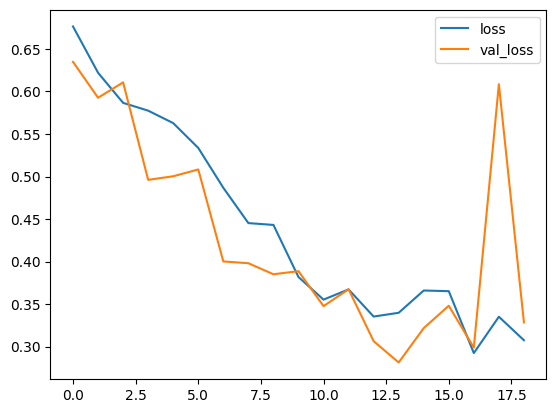

In [14]:
#Verificamos si nuestro modelo tiene sobreajuste
#En este caso no observamos
import pandas as pd
model_loss = pd.DataFrame(model.history.history)
model_loss[['loss','val_loss']].plot()


#### Evaluación del modelo


In [15]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

/opt/conda/lib/python3.10/site-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[288   6]
 [ 79 227]]
              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87       294
         1.0       0.97      0.74      0.84       306

    accuracy                           0.86       600
   macro avg       0.88      0.86      0.86       600
weighted avg       0.88      0.86      0.86       600



El modelo ha logrado una tasa de exactitud del 86% en el conjunto de prueba. El modelo se puede mejorar más aumentado la espera del objeto eraly stopping, ya que hemos observado que el modelo puede tener picos inciertos durante el entrenamiento